# CSE 163
## Final Project
## Statistical Analysis on Heart Disease Data

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [4]:
heart = pd.read_csv('heart_disease_uci.csv')
heart

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
heart.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [6]:
heart.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [7]:
heart.thal.value_counts()

normal               196
reversable defect    192
fixed defect          46
Name: thal, dtype: int64

In [8]:
heart.shape

(920, 16)

In [9]:
m = smf.ols("num ~ age + sex + cp + trestbps + chol + fbs + restecg + thalch + exang + oldpeak + slope + ca + thal", data = heart).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    num   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     21.82
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           3.38e-43
Time:                        21:42:18   Log-Likelihood:                -354.72
No. Observations:                 299   AIC:                             747.4
Df Residuals:                     280   BIC:                             817.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.0533      0.750      1.403      0.162      -0.424       2.531
sex[T.Male]                     0.2147      0.118      1.824      0.069      -0.017       0.446
cp[T.atypical angina]          -0.2846      0.157     -1.812      0.071      -0.594       0.025
cp[T.non-anginal]              -0.4625      0.130     -3.551      0.000      -0.719      -0.206
cp[T.typical angina]           -0.6959      0.198     -3.512      0.001      -1.086      -0.306
fbs[T.True]                     0.0164      0.143      0.114      0.909      -0.266       0.299
restecg[T.normal]              -0.1994      0.100     -1.985      0.048      -0.397      -0.002
restecg[T.st-t abnormality]     0.5487      0.428      1.283      0.201      -0.293       1.391
exang[T.True]                   0.1649      0.121      1.360      0.175      -0.074       0.403
slope[T.flat]                   0.0410      0.210      0.195      0.845      -0.372       0.453
slope[T.upsloping]             -0.2248      0.231     -0.972      0.332      -0.680       0.231
thal[T.normal]                 -0.1430      0.224     -0.639      0.523      -0.584       0.297
thal[T.reversable defect]       0.3947      0.213      1.851      0.065      -0.025       0.814
age                            -0.0071      0.006     -1.109      0.268      -0.020       0.006
trestbps                        0.0042      0.003      1.434      0.153      -0.002       0.010
chol                         9.282e-05      0.001      0.096      0.924      -0.002       0.002
thalch                         -0.0044      0.003     -1.619      0.106      -0.010       0.001
oldpeak                         0.1893      0.056      3.395      0.001       0.080       0.299
ca                              0.4200      0.059      7.079      0.000       0.303       0.537
==============================================================================
Omnibus:                       21.441   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.359
Skew:                           0.552   Prob(JB):                     1.15e-06
Kurtosis:                       3.988   Cond. No.                     5.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

4 significant values, ca, oldpeak, cp(non-aniginal), cp(typical angina)

When all else is held constant, 

Default:
female
asymptomatic
fbs false
lv hypertrophy
exang false
downsloping
fixed defect

In [10]:
heart.dataset.value_counts()

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

In [11]:
m = smf.ols("num ~ age + sex + dataset + cp + trestbps + chol + fbs + restecg + thalch + exang + oldpeak + slope + ca + thal", data = heart).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    num   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     19.69
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           3.43e-42
Time:                        21:42:19   Log-Likelihood:                -353.85
No. Observations:                 299   AIC:                             749.7
Df Residuals:                     278   BIC:                             827.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.1167      0.753      1.484      0.139      -0.365       2.598
sex[T.Male]                     0.2171      0.118      1.843      0.066      -0.015       0.449
dataset[T.Hungary]             -0.9031      0.841     -1.074      0.284      -2.558       0.752
dataset[T.Switzerland]      -1.703e-14   1.13e-14     -1.507      0.133   -3.93e-14    5.21e-15
dataset[T.VA Long Beach]       -0.5961      0.841     -0.709      0.479      -2.252       1.060
cp[T.atypical angina]          -0.2867      0.157     -1.823      0.069      -0.596       0.023
cp[T.non-anginal]              -0.4666      0.130     -3.579      0.000      -0.723      -0.210
cp[T.typical angina]           -0.7011      0.198     -3.535      0.000      -1.091      -0.311
fbs[T.True]                     0.0147      0.143      0.103      0.918      -0.268       0.297
restecg[T.normal]              -0.1910      0.101     -1.896      0.059      -0.389       0.007
restecg[T.st-t abnormality]     0.5454      0.428      1.274      0.204      -0.297       1.388
exang[T.True]                   0.1710      0.121      1.408      0.160      -0.068       0.410
slope[T.flat]                   0.0507      0.210      0.242      0.809      -0.362       0.464
slope[T.upsloping]             -0.2187      0.232     -0.944      0.346      -0.675       0.237
thal[T.normal]                 -0.1326      0.224     -0.592      0.555      -0.574       0.309
thal[T.reversable defect]       0.4113      0.214      1.924      0.055      -0.010       0.832
age                            -0.0076      0.006     -1.171      0.243      -0.020       0.005
trestbps                        0.0045      0.003      1.512      0.132      -0.001       0.010
chol                        -1.198e-05      0.001     -0.012      0.990      -0.002       0.002
thalch                         -0.0048      0.003     -1.757      0.080      -0.010       0.001
oldpeak                         0.1883      0.056      3.374      0.001       0.078       0.298
ca                              0.4145      0.060      6.962      0.000       0.297       0.532
==============================================================================
Omnibus:                       20.983   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.287
Skew:                           0.534   Prob(JB):                     1.19e-06
Kurtosis:                       4.024   Cond. No.                     4.43e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.61e-28. This might indicate that there are
strong multicollinearity problems

In [12]:
m = smf.ols("num ~ cp + oldpeak + ca", data = heart).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    num   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     56.94
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           1.25e-41
Time:                        21:42:19   Log-Likelihood:                -399.30
No. Observations:                 309   AIC:                             810.6
Df Residuals:                     303   BIC:                             833.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.6765      0.104      6.505      0.000       0.472       0.881
cp[T.atypical angina]    -0.6569      0.155     -4.237      0.000      -0.962      -0.352
cp[T.non-anginal]        -0.7917      0.125     -6.342      0.000      -1.037      -0.546
cp[T.typical angina]     -0.8635      0.197     -4.389      0.000      -1.251      -0.476
oldpeak                   0.3363      0.048      7.025      0.000       0.242       0.430
ca                        0.4612      0.058      8.016      0.000       0.348       0.574
==============================================================================
Omnibus:                       27.524   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.397
Skew:                           0.698   Prob(JB):                     5.60e-08
Kurtosis:                       3.805   Cond. No.                         8.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
female = heart[heart.sex == 'Female']
male = heart[heart.sex == 'Male']

In [14]:
m = smf.ols("num ~ age + sex + dataset + cp + trestbps + chol + fbs + restecg + thalch + exang + oldpeak + slope + ca + thal", data = female).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    num   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     17.17
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           1.02e-19
Time:                        21:42:19   Log-Likelihood:                -65.278
No. Observations:                  96   AIC:                             166.6
Df Residuals:                      78   BIC:                             212.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.1511      1.151      0.131      0.896      -2.140       2.442
dataset[T.Hungary]          -1.507e-14   1.02e-13     -0.147      0.883   -2.19e-13    1.89e-13
dataset[T.Switzerland]          -3e-15   5.17e-15     -0.580      0.563   -1.33e-14    7.29e-15
dataset[T.VA Long Beach]     2.216e-15   1.54e-15      1.439      0.154    -8.5e-16    5.28e-15
cp[T.atypical angina]          -0.3333      0.173     -1.922      0.058      -0.679       0.012
cp[T.non-anginal]              -0.4553      0.151     -3.013      0.003      -0.756      -0.154
cp[T.typical angina]           -0.6486      0.312     -2.079      0.041      -1.270      -0.027
fbs[T.True]                     0.3791      0.192      1.970      0.052      -0.004       0.762
restecg[T.normal]              -0.1163      0.122     -0.957      0.341      -0.358       0.126
restecg[T.st-t abnormality]     0.8197      0.369      2.221      0.029       0.085       1.554
exang[T.True]                  -0.0759      0.166     -0.457      0.649      -0.406       0.255
slope[T.flat]                  -0.1480      0.344     -0.431      0.668      -0.832       0.536
slope[T.upsloping]             -0.3157      0.378     -0.834      0.407      -1.069       0.438
thal[T.normal]                  0.0040      0.615      0.006      0.995      -1.220       1.227
thal[T.reversable defect]       1.1523      0.598      1.927      0.058      -0.038       2.343
age                            -0.0105      0.008     -1.349      0.181      -0.026       0.005
trestbps                        0.0064      0.003      1.849      0.068      -0.000       0.013
chol                           -0.0007      0.001     -0.676      0.501      -0.003       0.001
thalch                          0.0019      0.004      0.512      0.610      -0.005       0.009
oldpeak                         0.0645      0.085      0.755      0.452      -0.106       0.235
ca                              0.4555      0.084      5.406      0.000       0.288       0.623
==============================================================================
Omnibus:                       17.736   Durbin-Watson:                   2.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.196
Skew:                           0.851   Prob(JB):                     3.38e-06
Kurtosis:                       4.845   Cond. No.                     1.10e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.19e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
m = smf.ols("num ~ age + sex + dataset + cp + trestbps + chol + fbs + restecg + thalch + exang + oldpeak + slope + ca + thal", data = male).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    num   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     10.37
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           2.24e-20
Time:                        21:42:19   Log-Likelihood:                -261.36
No. Observations:                 203   AIC:                             562.7
Df Residuals:                     183   BIC:                             629.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.3544      1.013      1.337      0.183      -0.644       3.353
dataset[T.Hungary]             -1.0090      0.958     -1.053      0.294      -2.899       0.881
dataset[T.Switzerland]       8.277e-15   5.97e-15      1.386      0.168   -3.51e-15    2.01e-14
dataset[T.VA Long Beach]       -0.7691      0.969     -0.794      0.428      -2.680       1.142
cp[T.atypical angina]          -0.3249      0.224     -1.451      0.148      -0.767       0.117
cp[T.non-anginal]              -0.5286      0.186     -2.845      0.005      -0.895      -0.162
cp[T.typical angina]           -0.7574      0.253     -2.994      0.003      -1.257      -0.258
fbs[T.True]                    -0.0631      0.194     -0.325      0.746      -0.446       0.320
restecg[T.normal]              -0.2074      0.140     -1.487      0.139      -0.483       0.068
restecg[T.st-t abnormality]     1.4120      1.043      1.354      0.178      -0.646       3.470
exang[T.True]                   0.1990      0.166      1.196      0.233      -0.129       0.527
slope[T.flat]                   0.1423      0.278      0.513      0.609      -0.405       0.690
slope[T.upsloping]             -0.2499      0.307     -0.815      0.416      -0.855       0.355
thal[T.normal]                  0.0119      0.276      0.043      0.966      -0.532       0.555
thal[T.reversable defect]       0.4367      0.259      1.687      0.093      -0.074       0.948
age                            -0.0044      0.009     -0.492      0.623      -0.022       0.013
trestbps                        0.0043      0.004      0.991      0.323      -0.004       0.013
chol                           -0.0004      0.002     -0.229      0.819      -0.004       0.003
thalch                         -0.0054      0.004     -1.457      0.147      -0.013       0.002
oldpeak                         0.1810      0.075      2.414      0.017       0.033       0.329
ca                              0.3632      0.081      4.471      0.000       0.203       0.523
==============================================================================
Omnibus:                        8.662   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.580
Skew:                           0.450   Prob(JB):                       0.0137
Kurtosis:                       3.453   Cond. No.                     8.07e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.14e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
heart.age.min(), heart.age.max()

(28, 77)

In [17]:
heart.age.value_counts()

54    51
58    43
55    41
56    38
57    38
52    36
62    35
51    35
59    35
53    33
60    32
61    31
48    31
63    30
50    25
41    24
46    24
43    24
64    22
49    22
65    21
44    19
47    19
45    18
42    18
38    16
67    15
39    15
69    13
40    13
66    13
35    11
37    11
68    10
34     7
70     7
74     7
36     6
32     5
71     5
72     4
29     3
75     3
31     2
33     2
76     2
77     2
30     1
28     1
73     1
Name: age, dtype: int64

In [18]:
under55 = heart[heart.age < 55]
above55 = heart[heart.age >= 55]

In [19]:
m = smf.ols("num ~ age + sex + dataset + cp + trestbps + chol + fbs + restecg + thalch + exang + oldpeak + slope + ca + thal", data = under55).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    num   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     12.25
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           1.63e-19
Time:                        21:42:19   Log-Likelihood:                -132.42
No. Observations:                 139   AIC:                             302.8
Df Residuals:                     120   BIC:                             358.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.8721      1.064      1.760      0.081      -0.234       3.978
sex[T.Male]                     0.1644      0.148      1.112      0.268      -0.128       0.457
dataset[T.Hungary]             -0.9490      0.726     -1.307      0.194      -2.387       0.489
dataset[T.Switzerland]      -9.834e-15   5.39e-15     -1.825      0.071   -2.05e-14    8.36e-16
dataset[T.VA Long Beach]     -1.44e-14   7.12e-15     -2.023      0.045   -2.85e-14   -3.09e-16
cp[T.atypical angina]          -0.3627      0.185     -1.960      0.052      -0.729       0.004
cp[T.non-anginal]              -0.4764      0.163     -2.923      0.004      -0.799      -0.154
cp[T.typical angina]           -0.6543      0.272     -2.402      0.018      -1.194      -0.115
fbs[T.True]                    -0.3338      0.204     -1.636      0.105      -0.738       0.070
restecg[T.normal]              -0.1137      0.127     -0.894      0.373      -0.366       0.138
restecg[T.st-t abnormality] -2.323e-16   3.52e-16     -0.660      0.511   -9.29e-16    4.65e-16
exang[T.True]                   0.0937      0.167      0.560      0.577      -0.238       0.425
slope[T.flat]                   0.4416      0.289      1.529      0.129      -0.130       1.014
slope[T.upsloping]              0.0881      0.296      0.297      0.767      -0.498       0.674
thal[T.normal]                 -0.3918      0.383     -1.024      0.308      -1.149       0.366
thal[T.reversable defect]       0.3672      0.370      0.991      0.323      -0.366       1.101
age                            -0.0138      0.012     -1.150      0.253      -0.038       0.010
trestbps                       -0.0012      0.004     -0.283      0.778      -0.010       0.007
chol                           -0.0003      0.001     -0.194      0.847      -0.003       0.003
thalch                         -0.0035      0.004     -0.899      0.370      -0.011       0.004
oldpeak                         0.2420      0.077      3.133      0.002       0.089       0.395
ca                              0.3394      0.084      4.046      0.000       0.173       0.506
==============================================================================
Omnibus:                       17.521   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.345
Skew:                           0.622   Prob(JB):                     7.00e-07
Kurtosis:                       4.829   Cond. No.                     1.42e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.94e-38. This might indicate that there are
strong multicollinearity problems

In [20]:
m = smf.ols("num ~ age + sex + dataset + cp + trestbps + chol + fbs + restecg + thalch + exang + oldpeak + slope + ca + thal", data = above55).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    num   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     9.235
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           1.06e-16
Time:                        21:42:20   Log-Likelihood:                -202.55
No. Observations:                 160   AIC:                             445.1
Df Residuals:                     140   BIC:                             506.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.1936      1.530      0.780      0.437      -1.831       4.218
sex[T.Male]                     0.3514      0.186      1.888      0.061      -0.017       0.719
dataset[T.Hungary]             4.2e-15    3.7e-15      1.135      0.258   -3.12e-15    1.15e-14
dataset[T.Switzerland]       1.293e-14   1.41e-14      0.915      0.362    -1.5e-14    4.09e-14
dataset[T.VA Long Beach]       -0.3261      0.958     -0.340      0.734      -2.220       1.568
cp[T.atypical angina]          -0.2937      0.258     -1.138      0.257      -0.804       0.217
cp[T.non-anginal]              -0.3180      0.216     -1.476      0.142      -0.744       0.108
cp[T.typical angina]           -0.8758      0.294     -2.974      0.003      -1.458      -0.294
fbs[T.True]                     0.1707      0.209      0.816      0.416      -0.243       0.584
restecg[T.normal]              -0.3139      0.159     -1.970      0.051      -0.629       0.001
restecg[T.st-t abnormality]     0.5879      0.492      1.196      0.234      -0.384       1.560
exang[T.True]                   0.2275      0.177      1.283      0.202      -0.123       0.578
slope[T.flat]                  -0.3934      0.318     -1.236      0.218      -1.023       0.236
slope[T.upsloping]             -0.5849      0.368     -1.588      0.115      -1.313       0.143
thal[T.normal]                  0.1751      0.307      0.571      0.569      -0.431       0.781
thal[T.reversable defect]       0.5238      0.280      1.868      0.064      -0.030       1.078
age                            -0.0150      0.018     -0.844      0.400      -0.050       0.020
trestbps                        0.0072      0.004      1.700      0.091      -0.001       0.016
chol                         -5.64e-05      0.001     -0.041      0.967      -0.003       0.003
thalch                         -0.0037      0.004     -0.929      0.354      -0.012       0.004
oldpeak                         0.1115      0.083      1.341      0.182      -0.053       0.276
ca                              0.5074      0.089      5.683      0.000       0.331       0.684
==============================================================================
Omnibus:                        4.196   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                3.797
Skew:                           0.367   Prob(JB):                        0.150
Kurtosis:                       3.177   Cond. No.                     4.09e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-30. This might indicate that there are
strong multicollinearity problems

In [21]:
us = heart[(heart.dataset == 'VA Long Beach') | (heart.dataset == 'Cleveland')]
europe = heart[(heart.dataset == 'Switzerland') | (heart.dataset == 'Hungary')]

In [22]:
us.shape, europe.shape

((504, 16), (416, 16))

In [23]:
m = smf.ols("num ~ age + sex + cp + trestbps + chol + fbs + restecg + thalch + exang + oldpeak + slope + ca + thal", data = us).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    num   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     21.89
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           2.98e-43
Time:                        21:42:20   Log-Likelihood:                -353.44
No. Observations:                 298   AIC:                             744.9
Df Residuals:                     279   BIC:                             815.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.0953      0.751      1.458      0.146      -0.384       2.574
sex[T.Male]                     0.2177      0.118      1.850      0.065      -0.014       0.449
cp[T.atypical angina]          -0.2855      0.157     -1.817      0.070      -0.595       0.024
cp[T.non-anginal]              -0.4641      0.130     -3.564      0.000      -0.720      -0.208
cp[T.typical angina]           -0.6981      0.198     -3.524      0.000      -1.088      -0.308
fbs[T.True]                     0.0149      0.143      0.104      0.917      -0.267       0.297
restecg[T.normal]              -0.1933      0.101     -1.922      0.056      -0.391       0.005
restecg[T.st-t abnormality]     0.5461      0.428      1.277      0.203      -0.296       1.388
exang[T.True]                   0.1668      0.121      1.376      0.170      -0.072       0.405
slope[T.flat]                   0.0459      0.210      0.219      0.827      -0.367       0.458
slope[T.upsloping]             -0.2212      0.231     -0.956      0.340      -0.677       0.234
thal[T.normal]                 -0.1361      0.224     -0.608      0.544      -0.577       0.304
thal[T.reversable defect]       0.4041      0.213      1.894      0.059      -0.016       0.824
age                            -0.0078      0.006     -1.205      0.229      -0.020       0.005
trestbps                        0.0045      0.003      1.531      0.127      -0.001       0.010
chol                         9.769e-05      0.001      0.101      0.920      -0.002       0.002
thalch                         -0.0048      0.003     -1.748      0.082      -0.010       0.001
oldpeak                         0.1882      0.056      3.376      0.001       0.078       0.298
ca                              0.4171      0.059      7.025      0.000       0.300       0.534
==============================================================================
Omnibus:                       21.197   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.282
Skew:                           0.544   Prob(JB):                     1.19e-06
Kurtosis:                       4.006   Cond. No.                     5.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
m = smf.ols("num ~ age + sex + dataset + cp + trestbps + chol + fbs + restecg + thalch + exang + oldpeak + slope + ca + thal", data = europe).fit()
m.summary()

ValueError: resids must contain at least 2 elements

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [39]:
heart = heart.dropna()

In [40]:
y = heart.num
X0 = heart.drop("num", axis=1)
X0 = pd.get_dummies(X0, drop_first=True)
X0.shape

(299, 21)

In [37]:
rmse = np.sqrt(np.mean((y - np.mean(y))**2))
rmse

1.1420722054648151

In [50]:
m = KNeighborsRegressor(1)
_ = m.fit(X0, y)
yhat = m.predict(X0)
rmse = np.sqrt(np.mean((y - yhat)**2))
m.score(X0, y), rmse

(1.0, 0.0)

In [51]:
m = KNeighborsRegressor(10)
_ = m.fit(X0, y)
yhat = m.predict(X0)
rmse = np.sqrt(np.mean((y - yhat)**2))
m.score(X0, y), rmse

(0.1941594015953504, 1.1026723391948388)

In [42]:
from sklearn.model_selection import train_test_split
Xt, Xv, yt, yv = train_test_split(X0, y)

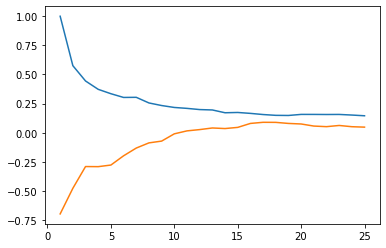

In [46]:
ks = range(1, 26)
accurt = []
accurv = []
for k in ks:
    m = KNeighborsRegressor(k)
    _ = m.fit(Xt, yt)
    acc = m.score(Xt, yt)
    accurt.append(acc)
    accv = m.score(Xv, yv)
    accurv.append(accv)
_ = plt.plot(ks, accurt)
_ = plt.plot(ks, accurv)

In [47]:
maxi = max(accurv)
index = accurv.index(maxi)
index

16

In [52]:
m = smf.ols("num ~ age + sex + dataset + cp + trestbps + chol + fbs + restecg + thalch + exang + oldpeak + slope + ca + thal", data = above55).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    num   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     9.235
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           1.06e-16
Time:                        22:06:46   Log-Likelihood:                -202.55
No. Observations:                 160   AIC:                             445.1
Df Residuals:                     140   BIC:                             506.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.1936      1.530      0.780      0.437      -1.831       4.218
sex[T.Male]                     0.3514      0.186      1.888      0.061      -0.017       0.719
dataset[T.Hungary]             4.2e-15    3.7e-15      1.135      0.258   -3.12e-15    1.15e-14
dataset[T.Switzerland]       1.293e-14   1.41e-14      0.915      0.362    -1.5e-14    4.09e-14
dataset[T.VA Long Beach]       -0.3261      0.958     -0.340      0.734      -2.220       1.568
cp[T.atypical angina]          -0.2937      0.258     -1.138      0.257      -0.804       0.217
cp[T.non-anginal]              -0.3180      0.216     -1.476      0.142      -0.744       0.108
cp[T.typical angina]           -0.8758      0.294     -2.974      0.003      -1.458      -0.294
fbs[T.True]                     0.1707      0.209      0.816      0.416      -0.243       0.584
restecg[T.normal]              -0.3139      0.159     -1.970      0.051      -0.629       0.001
restecg[T.st-t abnormality]     0.5879      0.492      1.196      0.234      -0.384       1.560
exang[T.True]                   0.2275      0.177      1.283      0.202      -0.123       0.578
slope[T.flat]                  -0.3934      0.318     -1.236      0.218      -1.023       0.236
slope[T.upsloping]             -0.5849      0.368     -1.588      0.115      -1.313       0.143
thal[T.normal]                  0.1751      0.307      0.571      0.569      -0.431       0.781
thal[T.reversable defect]       0.5238      0.280      1.868      0.064      -0.030       1.078
age                            -0.0150      0.018     -0.844      0.400      -0.050       0.020
trestbps                        0.0072      0.004      1.700      0.091      -0.001       0.016
chol                         -5.64e-05      0.001     -0.041      0.967      -0.003       0.003
thalch                         -0.0037      0.004     -0.929      0.354      -0.012       0.004
oldpeak                         0.1115      0.083      1.341      0.182      -0.053       0.276
ca                              0.5074      0.089      5.683      0.000       0.331       0.684
==============================================================================
Omnibus:                        4.196   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                3.797
Skew:                           0.367   Prob(JB):                        0.150
Kurtosis:                       3.177   Cond. No.                     4.09e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-30. This might indicate that there are
strong multicollinearity problems

In [55]:
import statsmodels.api as sm

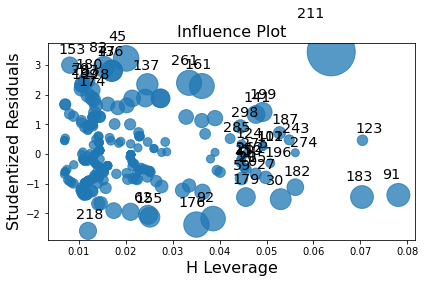

In [61]:
m = smf.ols("num ~ cp + oldpeak + ca", data = heart).fit()
m.summary()
fig = sm.graphics.influence_plot(m, criterion='cooks')
fig.tight_layout(pad=1.0)